In [1]:
!pip install pykeen networkx matplotlib

In [2]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

INFO:pykeen.utils:Using opt_einsum


In [3]:
from pykeen.datasets import DBpedia50

In [4]:
# Загрузка графового датасета DBpedia50
dbpedia_dataset = DBpedia50()

In [5]:
# Просмотр описания датасета
print(dbpedia_dataset)

DBpedia50(training_path="/root/.data/pykeen/datasets/dbpedia50/train.txt", testing_path="/root/.data/pykeen/datasets/dbpedia50/test.txt", validation_path="/root/.data/pykeen/datasets/dbpedia50/valid.txt")


In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


**Node Similarity** и измерение сходства узлов на основе представления являются важными концепциями в графовых нейронных сетях. Эти меры помогают понять структуру графа и выявлять взаимосвязи между узлами. Визуализация представлений узлов может позволить наглядно представить этот процесс и лучше понять, как модель интерпретирует данные в графе.

В рамках этой работы мы рассмотрели что такое Node Similarity как ее рассчитать и как можноиспользовать. Однако, для получения более полного понимания вы можете выполнить следующие задания:

**Исследование влияния числа эпох обучения**
> Измените число эпох обучения в лабораторной работе и оцените, как это влияет на представления узлов и Node Similarity. Добавьте график, отображающий изменение метрики Node Similarity в зависимости от числа эпох.

**Сравнение различных моделей**
> Попробуйте другие модели графовых вложений, такие как HolE или DistMult, и сравните их эффективность в предсказании отношений и измерении Node Similarity.

**Анализ случайных узлов**
> Выберите несколько случайных узлов и проанализируйте их сходство с другими узлами. Обратите внимание на изменения при изменении числа эпох обучения или использовании различных моделей.


# Эксперимент с 5, 10, 15, 20, 25 эпохами обучения
## Используемая модель complEx

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.42s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.39s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/15 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.41s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.40s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.40s seconds


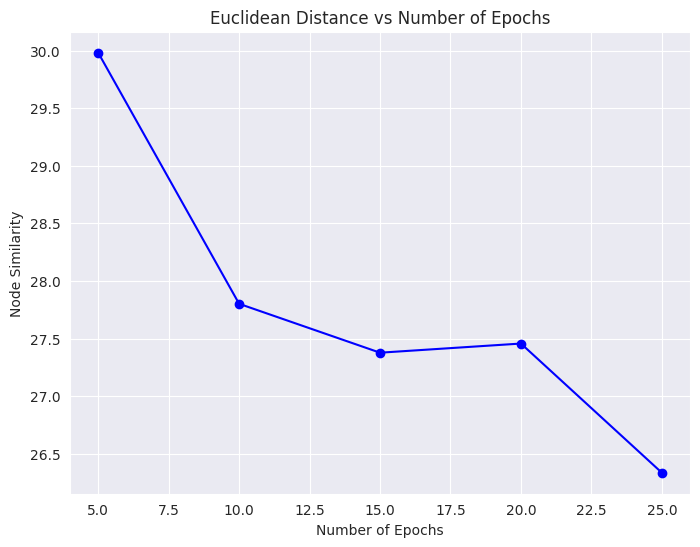

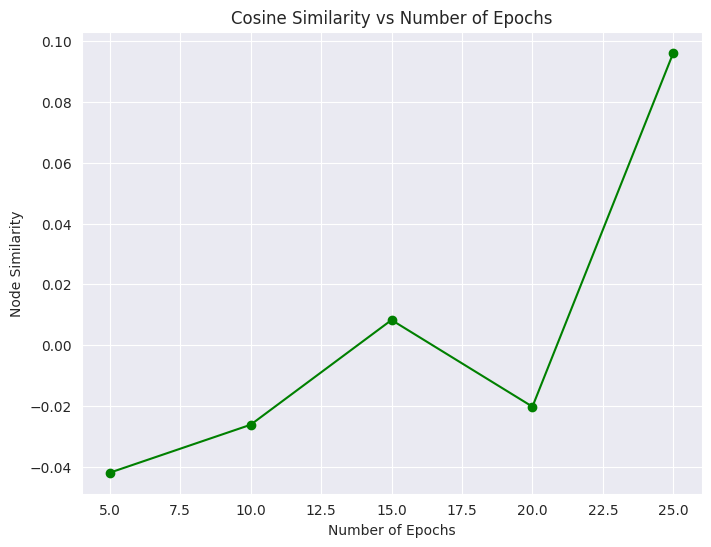

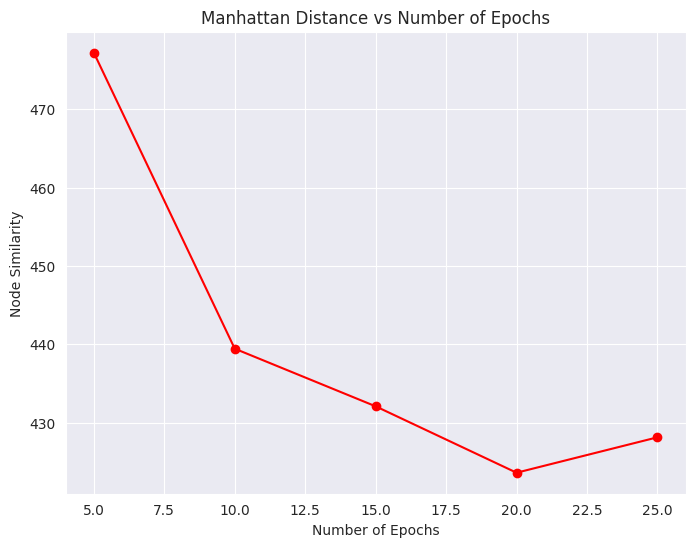

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

epochs_range = [5, 10, 15, 20, 25]

node_indices = [1324, 12240]

similarities_euclidean_list = []
similarities_cosine_list = []
similarities_manhattan_list = []

for num_epochs in epochs_range:
    pipeline_results = pipeline(
        model="ComplEx",
        dataset=dbpedia_dataset,
        training_kwargs=dict(num_epochs=num_epochs),
        device=device
    )

    node_embeddings_np = pipeline_results.model.entity_representations[0]._embeddings.weight.cpu().detach().numpy()

    selected_node_embeddings = node_embeddings_np[node_indices]

    similarity_matrix_euclidean = euclidean_distances(selected_node_embeddings)
    similarity_matrix_cosine = cosine_similarity(selected_node_embeddings)
    similarity_matrix_manhattan = manhattan_distances(selected_node_embeddings)

    similarities_euclidean_list.append(similarity_matrix_euclidean[0, 1])
    similarities_cosine_list.append(similarity_matrix_cosine[0, 1])
    similarities_manhattan_list.append(similarity_matrix_manhattan[0, 1])

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_euclidean_list, marker='o', linestyle='-', color='b')
plt.title('Euclidean Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_cosine_list, marker='o', linestyle='-', color='g')
plt.title('Cosine Similarity vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_manhattan_list, marker='o', linestyle='-', color='r')
plt.title('Manhattan Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()


## Используемая модель HolE

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.50s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.58s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/15 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.58s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.51s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=128.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 4.56s seconds


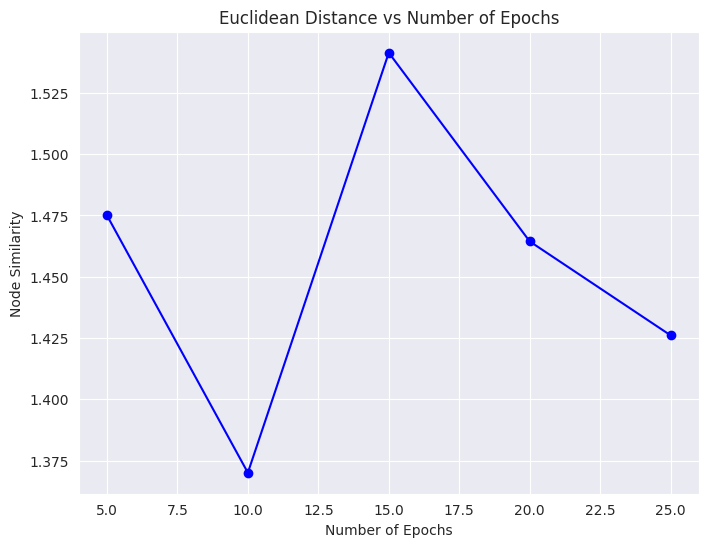

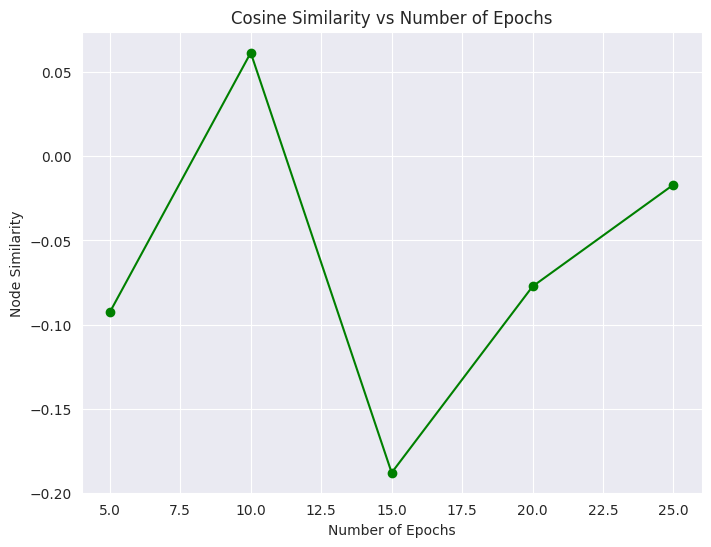

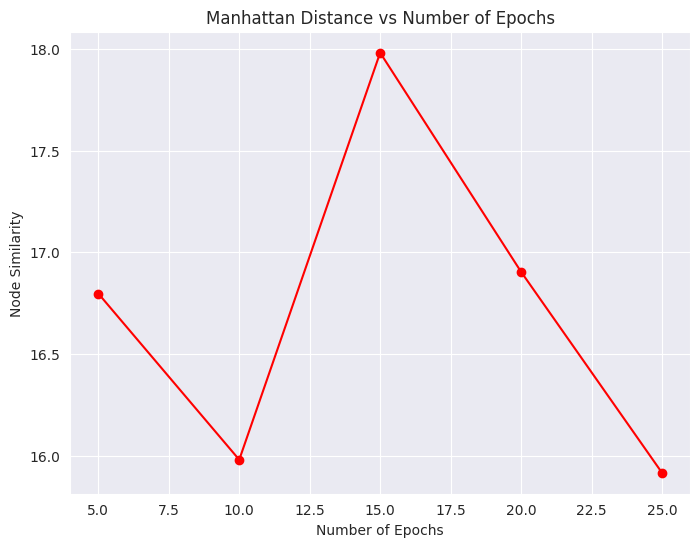

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

epochs_range = [5, 10, 15, 20, 25]

node_indices = [1324, 12240]

similarities_euclidean_list = []
similarities_cosine_list = []
similarities_manhattan_list = []

for num_epochs in epochs_range:
    
    pipeline_results = pipeline(
        model="HolE",
        dataset=dbpedia_dataset,
        training_kwargs=dict(num_epochs=num_epochs),
        device=device
    )

    node_embeddings_np = pipeline_results.model.entity_representations[0]._embeddings.weight.cpu().detach().numpy()

    selected_node_embeddings = node_embeddings_np[node_indices]

    similarity_matrix_euclidean = euclidean_distances(selected_node_embeddings)
    similarity_matrix_cosine = cosine_similarity(selected_node_embeddings)
    similarity_matrix_manhattan = manhattan_distances(selected_node_embeddings)

    similarities_euclidean_list.append(similarity_matrix_euclidean[0, 1])
    similarities_cosine_list.append(similarity_matrix_cosine[0, 1])
    similarities_manhattan_list.append(similarity_matrix_manhattan[0, 1])

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_euclidean_list, marker='o', linestyle='-', color='b')
plt.title('Euclidean Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_cosine_list, marker='o', linestyle='-', color='g')
plt.title('Cosine Similarity vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_manhattan_list, marker='o', linestyle='-', color='r')
plt.title('Manhattan Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()


## Используемая модель DistMult

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.65s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.66s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/15 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.81s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.65s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.65s seconds


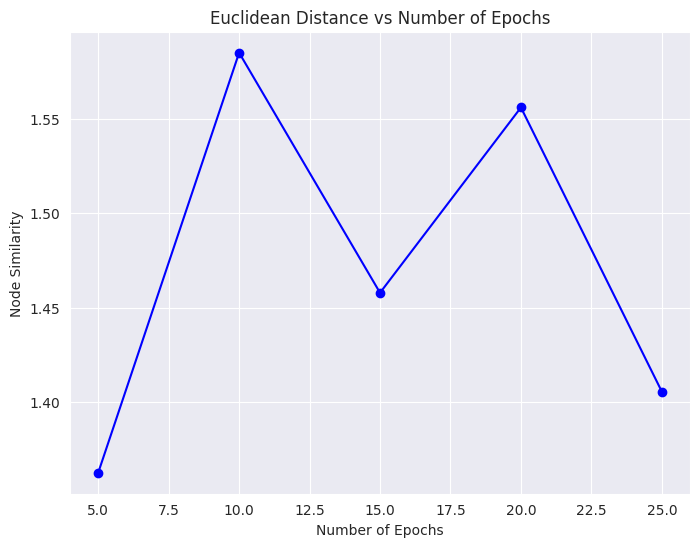

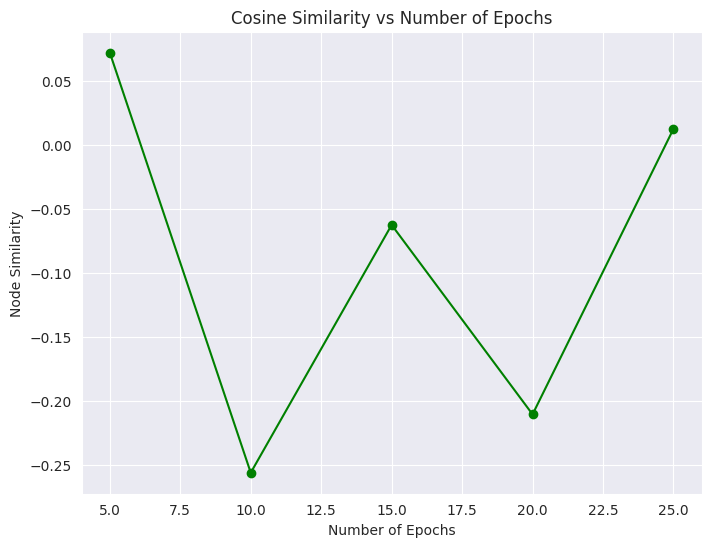

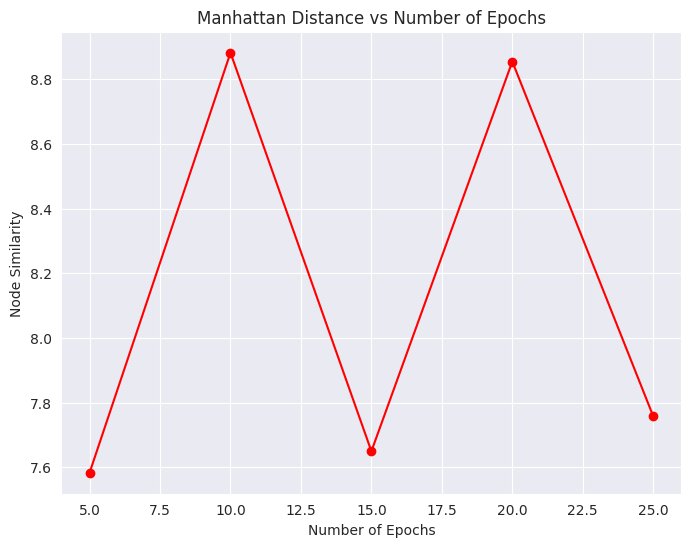

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

epochs_range = [5, 10, 15, 20, 25]

node_indices = [1324, 12240]

similarities_euclidean_list = []
similarities_cosine_list = []
similarities_manhattan_list = []

for num_epochs in epochs_range:
    
    pipeline_results = pipeline(
        model="DistMult",
        dataset=dbpedia_dataset,
        training_kwargs=dict(num_epochs=num_epochs),
        device=device
    )

    node_embeddings_np = pipeline_results.model.entity_representations[0]._embeddings.weight.cpu().detach().numpy()

    selected_node_embeddings = node_embeddings_np[node_indices]

    similarity_matrix_euclidean = euclidean_distances(selected_node_embeddings)
    similarity_matrix_cosine = cosine_similarity(selected_node_embeddings)
    similarity_matrix_manhattan = manhattan_distances(selected_node_embeddings)

    similarities_euclidean_list.append(similarity_matrix_euclidean[0, 1])
    similarities_cosine_list.append(similarity_matrix_cosine[0, 1])
    similarities_manhattan_list.append(similarity_matrix_manhattan[0, 1])

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_euclidean_list, marker='o', linestyle='-', color='b')
plt.title('Euclidean Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_cosine_list, marker='o', linestyle='-', color='g')
plt.title('Cosine Similarity vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, similarities_manhattan_list, marker='o', linestyle='-', color='r')
plt.title('Manhattan Distance vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Node Similarity')
plt.grid(True)
plt.show()


## Анализ случайного узла с различным количеством эпох

In [26]:
random_node_index = 1324
epochs_range = [5, 10, 15, 20, 25]
methods = ['nan_euclidean']
def nearest_nodes(method):
    nn_model = NearestNeighbors(n_neighbors=4, metric=method)
    nn_model.fit(embedding_numpy)
    distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
    print('Метрика:'+method )
    print(f'Дистанции:{distances}' )
    print(f'Индексы:{indices}' )

    neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
    print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")
for num_epochs in epochs_range:
  node_embeddings = pipeline_results.model.entity_representations

  embedding_matrix = node_embeddings[0]._embeddings.weight.data

  embedding_numpy = embedding_matrix.cpu().numpy()
  id_to_lable = list(dbpedia_dataset.testing.entity_id_to_label.values())
  for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.         0.59784657 0.63289255 0.66596556]]
Индексы:[[ 1324  1528  8049 22148]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Andrew_Jackson_Sevier', 'George_Eustis,_Sr.', 'Thornton_F._Bell'] 

Метрика:nan_euclidean
Дистанции:[[0.         0.59784657 0.63289255 0.66596556]]
Индексы:[[ 1324  1528  8049 22148]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Andrew_Jackson_Sevier', 'George_Eustis,_Sr.', 'Thornton_F._Bell'] 

Метрика:nan_euclidean
Дистанции:[[0.         0.59784657 0.63289255 0.66596556]]
Индексы:[[ 1324  1528  8049 22148]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Andrew_Jackson_Sevier', 'George_Eustis,_Sr.', 'Thornton_F._Bell'] 

Метрика:nan_euclidean
Дистанции:[[0.         0.59784657 0.63289255 0.66596556]]
Индексы:[[ 1324  1528  8049 22148]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Andrew_Jackson_Sevier', 'George_Eustis,_Sr.', 'Thornton_F._B

In [30]:
import numpy as np

random_node_index = 1324
epochs_range = [5, 10, 15, 20, 25]
methods = ['euclidean', 'cosine', 'manhattan']

for num_epochs in epochs_range:
    # Обучение модели с текущим числом эпох
    pipeline_results = pipeline(
        model="ComplEx",
        dataset=dbpedia_dataset,
        training_kwargs=dict(num_epochs=num_epochs),
        device=device
    )

    # Переводим представления узлов в массив NumPy
    node_embeddings_np = pipeline_results.model.entity_representations[0]._embeddings.weight.cpu().detach().numpy()

    # Извлечение представлений случайного узла
    selected_node_embedding = node_embeddings_np[random_node_index]

    for method in methods:
        # Вычисление матрицы сходства для разных методов
        similarity = NearestNeighbors(n_neighbors=4, metric=method).fit(node_embeddings_np)
        distances, indices = similarity.kneighbors([selected_node_embedding])

        # Вывод результатов
        print(f"Число эпох: {num_epochs}, Метрика: {method}")
        print(f"Дистанции: {distances}")
        print(f"Индексы: {indices}")

        # Визуализация ближайших соседей
        neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
        print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels}\n")


INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.40s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Число эпох: 5, Метрика: euclidean
Дистанции: [[3.37174788e-07 2.42976638e+01 2.43794617e+01 2.47953120e+01]]
Индексы: [[ 1324 19183 17022 17174]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Selah_Sue_(album)', 'Platanthera_flava', 'Prairie_Public_Radio']

Число эпох: 5, Метрика: cosine
Дистанции: [[0.         0.7825216  0.80108446 0.8052475 ]]
Индексы: [[ 1324 15483 17022 16498]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Niclas_Nyhlén', 'Platanthera_flava', 'Paul_Chiu']

Число эпох: 5, Метрика: manhattan
Дистанции: [[  0.         387.5947876  388.24493408 388.95071411]]
Индексы: [[ 1324 17022 18977 11935]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Platanthera_flava', 'Satsumasendai,_Kagoshima', 'Kieran_Lalor']



Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.40s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Число эпох: 10, Метрика: euclidean
Дистанции: [[3.37174788e-07 2.44911084e+01 2.50451423e+01 2.50565401e+01]]
Индексы: [[ 1324 13000 12592  3000]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'London_Bridge_station', 'Lepidoptera', 'Blood_Promise_(novel)']

Число эпох: 10, Метрика: cosine
Дистанции: [[0.         0.80418557 0.8203409  0.8203793 ]]
Индексы: [[ 1324 12592  8558 10255]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Lepidoptera', 'Grandas_de_Salime', 'Ivan_Kryvosheyenko']

Число эпох: 10, Метрика: manhattan
Дистанции: [[  0.         377.01312256 394.92123413 395.70742798]]
Индексы: [[ 1324 13000 17271 12592]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'London_Bridge_station', 'Private_Valentine:_Blonde_&_Dangerous', 'Lepidoptera']



Training epochs on cuda:0:   0%|          | 0/15 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.41s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Число эпох: 15, Метрика: euclidean
Дистанции: [[4.76837158e-07 2.48631840e+01 2.50733628e+01 2.52477011e+01]]
Индексы: [[ 1324  3113  7570 18822]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Bolero', 'Francis_Monkman', 'Samantha_Fox']

Число эпох: 15, Метрика: cosine
Дистанции: [[1.1920929e-07 8.0856985e-01 8.2107341e-01 8.2276571e-01]]
Индексы: [[ 1324 17114 22781 15219]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Popowia', 'Udaari', 'Nathan_Tyson']

Число эпох: 15, Метрика: manhattan
Дистанции: [[  0.         398.33914185 399.66152954 401.01809692]]
Индексы: [[1324 2674  430 3113]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Benedetto_Croce', 'A+_(rapper)', 'Bolero']



Training epochs on cuda:0:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.50s seconds
INFO:pykeen.pipeline.api:Using device: cuda


Число эпох: 20, Метрика: euclidean
Дистанции: [[3.37174788e-07 2.46860598e+01 2.47178055e+01 2.48080054e+01]]
Индексы: [[ 1324 19823 19920  5663]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Some_Buried_Caesar', 'South_Africa', 'Deportivo_Lara']

Число эпох: 20, Метрика: cosine
Дистанции: [[0.        0.7979204 0.8058562 0.8276676]]
Индексы: [[ 1324  6207 12689 12291]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Désiré_Koranyi', 'Liberman_Broadcasting', 'Lady_June']

Число эпох: 20, Метрика: manhattan
Дистанции: [[  0.         388.62838745 389.31655884 391.96740723]]
Индексы: [[ 1324 19823  8296 24544]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Some_Buried_Caesar', 'Glen_Cove,_New_York', 'Zunzgen']



Training epochs on cuda:0:   0%|          | 0/25 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/126 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=256.


Evaluating on cuda:0:   0%|          | 0.00/2.10k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 1.52s seconds


Число эпох: 25, Метрика: euclidean
Дистанции: [[4.76837158e-07 2.48196203e+01 2.50085276e+01 2.51171486e+01]]
Индексы: [[ 1324  9981  7095 15422]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Impossible_(Daniel_Merriweather_song)', 'Fabio_Artico', 'Newburn']

Число эпох: 25, Метрика: cosine
Дистанции: [[0.         0.8079751  0.80938303 0.8174448 ]]
Индексы: [[ 1324  3817 20360 18555]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Carlos_Larrañaga', 'Stotfold_F.C.', 'Run_to_the_Hills']

Число эпох: 25, Метрика: manhattan
Дистанции: [[  0.         395.68624878 399.64358521 400.32006836]]
Индексы: [[ 1324 22287  3817 18131]]
Ближайшие соседи узла Alphonse_J._Jackson: ['Alphonse_J._Jackson', 'Tischeria', 'Carlos_Larrañaga', 'River_Severn']

